# Fuel Consumption Prediction of Vehicles

## Objective
The goal of this project is to predict the **fuel consumption (MPG)** of vehicles based on their attributes, including engine specifications, weight, and acceleration.

## Dataset Overview
The dataset contains records of vehicles with features relevant to fuel efficiency prediction.

## Instructions
1. **Data Exploration**: Load and examine the dataset.
2. **Data Preprocessing**: Handle missing values, encode categorical variables, and normalize numerical features.
3. **Feature Selection**: Identify important predictors for fuel efficiency.
4. **Model Training**: Train a regression model to predict fuel consumption (MPG).
5. **Evaluation**: Assess model performance using RMSE and R² score.

In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [11]:

# Load the dataset (auto-mpg.data file)
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]
df = pd.read_csv('auto-mpg.data', delim_whitespace=True, names=column_names, na_values='?')

# Display basic information about the dataset
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Float64Index: 398 entries, 18.0 to 31.0
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    int64  
 1   cylinders     398 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    int64  
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 28.0+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Exploratory Data Analysis (EDA)
- Check for missing values
- Visualize key distributions
- Identify correlations between features

missing values in each collumn:
mpg             0
cylinders       0
displacement    6
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

After dropping missing values:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


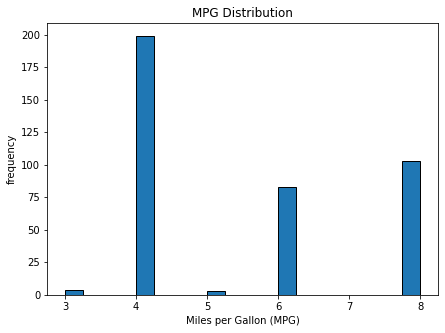

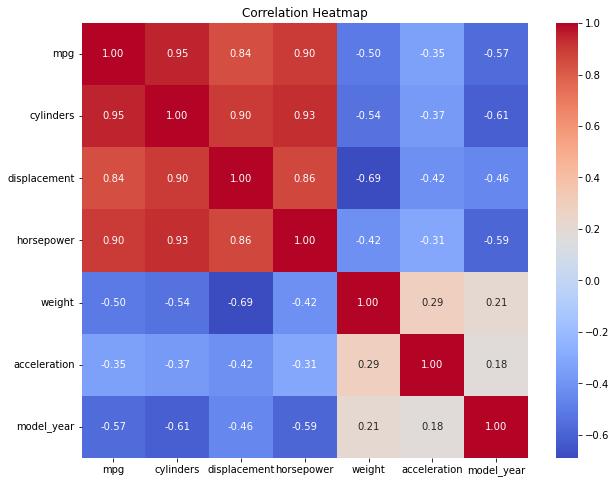

In [12]:

# Check for missing values
print('missing values in each collumn:')
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()
print('\nAfter dropping missing values:')
print(df.isnull().sum())

# Visualize MPG distribution
plt.figure(figsize=(7,5))
plt.hist(df["mpg"],bins=20,edgecolor='black')
plt.title('MPG Distribution')
plt.xlabel('Miles per Gallon (MPG)')
plt.ylabel('frequency')
plt.show()

# Correlation heatmap (numerical features only)
# Correlation heatmap (numerical features only)
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Data Preprocessing
- Handle missing values
- Encode categorical variables
- Normalize numerical features

In [21]:
# Encode categorical variables (Origin as categorical feature)
#df = pd.get_dummies(df, columns=['origin'], drop_first=True)

# Define features and target variable
x = df.drop('mpg', axis=1)
y = df['mpg']

# Split into train and test sets
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train, x_tet, y_train, y_test = train_test_split(x_scaled, y,test_size= 0.2, random_state=42 )



## Model Training
Train a **Linear Regression** model to predict fuel consumption.

In [24]:

# Train a Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE:  {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²:   {r2:.3f}")



MSE:  134948403281123310736555114496.000
RMSE: 367353240466343.688
R²:   -45294879255538906972083453952.000
